<a href="https://colab.research.google.com/github/OptimoCX/BootCampIA/blob/main/NLP_Basico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción al NLP (Procesamiento del Lenguaje Natural)

El NLP es una rama de la inteligencia artificial que se ocupa de la interacción entre las computadoras y el lenguaje humano. En esta notebook exploraremos conceptos básicos de NLP como tokenización, stopwords, stemming, lematización y representación vectorial del texto.



In [1]:
# Instalamos las bibliotecas necesarias para procesamiento de lenguaje natural (NLP) y análisis de datos
# - nltk: procesamiento básico de lenguaje
# - spacy: procesamiento avanzado y eficiente de texto
# - sklearn: herramientas de machine learning (clasificación, regresión, etc.)
# - pandas: manipulación de datos estructurados (tablas)
# - matplotlib y seaborn: visualización de datos
!pip install nltk spacy sklearn pandas matplotlib seaborn --quiet
# Descargamos recursos de NLTK:
# - 'punkt': modelo de tokenización de oraciones y palabras
# - 'stopwords': lista de palabras vacías comunes (como "the", "is", etc.)
!python -m nltk.downloader punkt stopwords
# Descargamos el modelo pequeño de spaCy para el idioma inglés
# Este modelo incluye lematización, reconocimiento de entidades, y análisis sintáctico
!python -m spacy download en_core_web_sm

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.2 MB/s eta 0:00:00
✔ Download and install

1. **Tokenización Básica**

Tokenizar es el proceso de dividir un texto en unidades más pequeñas llamadas tokens.

**¿Por qué es importante tokenizar?**

Tokenizar es un paso fundamental y previo para casi todas las tareas de NLP.

Permite a los algoritmos entender y procesar el texto de manera estructurada.

Facilita el análisis semántico y sintáctico.

Ayuda a limpiar, normalizar y preparar datos textuales para modelos de Machine Learning o Deep Learning.

Es necesaria para aplicar técnicas como: eliminación de stopwords, lematización, análisis de sentimientos, clasificación de textos, etc.

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
# Descargamos el recurso 'punkt', que contiene los modelos de tokenización de oraciones y palabras.
# Esto es esencial para que funciones como sent_tokenize() y word_tokenize() funcionen correctamente.
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Definimos un texto de ejemplo sobre procesamiento de lenguaje natural
text = "Hello! Natural Language Processing is fun. Let's learn how machines understand human language."

# Tokenizamos el texto en oraciones utilizando NLTK
# La función sent_tokenize separa el texto en frases u oraciones completas
sentences = sent_tokenize(text)
print("Oraciones:", sentences)

# Tokenizamos el texto en palabras
# La función word_tokenize separa el texto en palabras individuales, signos de puntuación incluidos
tokens = word_tokenize(text)
print("Palabras:", tokens)

Oraciones: ['Hello!', 'Natural Language Processing is fun.', "Let's learn how machines understand human language."]
Palabras: ['Hello', '!', 'Natural', 'Language', 'Processing', 'is', 'fun', '.', 'Let', "'s", 'learn', 'how', 'machines', 'understand', 'human', 'language', '.']


2. **Eliminacion de Palabras vacías:**

**¿Qué son las stopwords?**

Las stopwords (o palabras vacías) son palabras muy comunes en un idioma que, por sí solas, no aportan mucho significado al análisis del texto.

Ejemplos en inglés:
"is", "the", "and", "in", "of", "to", "a"

Ejemplos en español:
"el", "la", "de", "y", "en", "un"

**¿Por qué eliminarlas?**


Son muy frecuentes, pero no ayudan a entender el contenido principal del texto.

Su presencia puede afectar el rendimiento de modelos de machine learning al introducir ruido.

Ayudan a reducir el tamaño del vocabulario, mejorando eficiencia y claridad.

In [ ]:
# Importamos las palabras vacías (stopwords) del módulo corpus de NLTK
from nltk.corpus import stopwords

# Obtenemos la lista de stopwords en inglés y la convertimos a un conjunto para mejorar el rendimiento en búsquedas
stop_words = set(stopwords.words("english"))

# Recorremos los tokens y eliminamos aquellos que estén en la lista de stopwords
# Convertimos cada palabra a minúscula para asegurar la comparación correcta
nonstopwords = [word for word in tokens if word.lower() not in stop_words]
stopwords = [word for word in tokens if word.lower() in stop_words]

# Mostramos el resultado: los tokens después de eliminar las palabras vacías
print("Tokens sin stopwords:", nonstopwords)

# Mostramos el resultado: los tokens después de eliminar las palabras vacías
print("Tokens stopwords:", stopwords)

Tokens sin stopwords: ['Hello', '!', 'Natural', 'Language', 'Processing', 'fun', '.', 'Let', "'s", 'learn', 'machines', 'understand', 'human', 'language', '.']
Tokens stopwords: ['is', 'how']


3. Stemming (raíz gramatical)

Definición:
Es el proceso de reducir una palabra a su raíz o forma base mediante la eliminación de sufijos.
No considera el contexto gramatical ni si la raíz resultante es una palabra válida.

Ejemplos:

"running" → "run"

"studies" → "studi"

"easily" → "easili"

Características:

Rápido y simple.

Puede producir resultados incorrectos o no reales.

Útil cuando se necesita velocidad más que precisión.

4. Lematización

Definición:
Es el proceso de reducir una palabra a su forma base o lema, utilizando un diccionario lingüístico (como WordNet) y considerando el significado y el contexto gramatical.

Ejemplos:

"running" → "run"

"better" → "good"

"flies" → "fly"

Características:

Más precisa que el stemming.

Más lenta, ya que necesita analizar la estructura gramatical.

Ideal cuando se necesita análisis semántico (entender el significado).

In [ ]:
# Importa la librería NLTK, que es una colección de herramientas para procesamiento de lenguaje natural (NLP)
import nltk

# Descarga el recurso 'wordnet' desde NLTK.
# WordNet es una base de datos léxica del inglés utilizada para la lematización y otras tareas semánticas.
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('omw-1.4')  # Mejora resultados con sinónimos y traducciones

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# Importamos las clases necesarias desde la biblioteca NLTK
from nltk.stem import PorterStemmer  # Para aplicar Stemming
from nltk.stem import WordNetLemmatizer  # Para aplicar Lemmatization

# Creamos una instancia del Stemmer de Porter
stemmer = PorterStemmer()

# Creamos una instancia del Lemmatizer basado en WordNet
lemmatizer = WordNetLemmatizer()

# Lista de palabras para aplicar stemming
words_for_stemming = ["running", "flies", "easily", "fairly", "studies", "studying", "happily", "faster", "caring", "national"]

print("Stemming:")
# Aplicamos el stemmer a cada palabra y mostramos el resultado
for word in words_for_stemming:
    print(f"{word} → {stemmer.stem(word)}")

# Lista de palabras para aplicar lemmatization
words_for_lemmatization = ["flies","caring", "faster", "national", "studies", "feet"]

print("\nLemmatization:")
# Aplicamos el lematizador a cada palabra y mostramos el resultado
for word in words_for_lemmatization:
    print(f"{word} → {lemmatizer.lemmatize(word)}")


Stemming:
running → run
flies → fli
easily → easili
fairly → fairli
studies → studi
studying → studi
happily → happili
faster → faster
caring → care
national → nation

Lemmatization:
flies → fly
caring → caring
faster → faster
national → national
studies → study
feet → foot


**Lematizacion en Español:**

In [ ]:
#Esta instrucción descarga e instala el modelo preentrenado de spaCy para el idioma español, llamado es_core_news_sm.
!python -m spacy download es_core_news_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/es_core_news_sm-3.8.0/es_core_news_sm-3.8.0-py3-none-any.whl (12.9 MB)
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# Qué es es_core_news_sm?

es_core_news_sm es un modelo de procesamiento de lenguaje natural (NLP) en español proporcionado por spaCy. Es una versión pequeña ("sm" de small) del modelo de idioma para español, que incluye:

Tokenización: División del texto en palabras, signos de puntuación y otros elementos.
Lematización: Reducción de las palabras a su forma base (ej. corriendo → correr).
Etiquetado gramatical (POS tagging): Asignación de categorías gramaticales a cada palabra.
Dependencias sintácticas: Relación entre las palabras en una oración.
Reconocimiento de entidades nombradas (NER): Identificación de nombres propios, organizaciones, lugares, etc.

In [ ]:
import spacy

# Cargar el modelo de español
nlp = spacy.load("es_core_news_sm")

# Prueba con un texto
doc = nlp("Los gatos están corriendo rápidamente.")
for token in doc:
    print(f"{token.text} -> {token.lemma_}")

Los -> el
gatos -> gato
están -> estar
corriendo -> correr
rápidamente -> rápidamente
. -> .


In [ ]:
import spacy

# Cargar el modelo de español
nlp = spacy.load("es_core_news_sm")

# Prueba con un texto
doc = nlp("Dice la ciencia que en el 2032 caera un meteorito sobre la tierra.")
for token in doc:
    print(f"{token.text} -> {token.lemma_}")

Dice -> decir
la -> el
ciencia -> ciencia
que -> que
en -> en
el -> el
2032 -> 2032
caera -> caera
un -> uno
meteorito -> meteorito
sobre -> sobre
la -> el
tierra -> tierra
. -> .


5. Representación de texto: De palabras a numeros

In [ ]:
#One - Hot Enconding
from sklearn.preprocessing import OneHotEncoder
import numpy as np
encoder = OneHotEncoder()
words = np.array(["gato", "perro", "ratón"]).reshape(-1, 1)
print(encoder.fit_transform(words).toarray())

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


**Bag of Words y TF-IDF**

El TF-IDF (Term Frequency-Inverse Document Frequency) es una técnica que se usa para convertir texto en valores numéricos, midiendo la importancia de las palabras en un documento dentro de un conjunto de documentos o corpus. Es muy útil en tareas como clasificación de texto, búsqueda de información y análisis de texto.

**¿Por qué es útil?** <P/>
Palabras comunes como "el", "de", "y" (palabras vacías) tendrán un IDF bajo porque aparecen en casi todos los documentos.
Palabras más específicas y raras tendrán un IDF alto, aumentando su importancia en ese documento.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

corpus = ["Me gustan los gatos", "Los gatos son lindos", "Me gustan los perros"]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Convertir a un DataFrame para mejor visualización
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=corpus)
print(df)


                         gatos    gustan    lindos       los        me  \
Me gustan los gatos   0.526820  0.526820  0.000000  0.409123  0.526820   
Los gatos son lindos  0.444514  0.000000  0.584483  0.345205  0.000000   
Me gustan los perros  0.000000  0.480458  0.000000  0.373119  0.480458   

                        perros       son  
Me gustan los gatos   0.000000  0.000000  
Los gatos son lindos  0.000000  0.584483  
Me gustan los perros  0.631745  0.000000  


In [ ]:
# Imprimir los términos con sus valores TF-IDF por documento
feature_names = vectorizer.get_feature_names_out()
for i, doc in enumerate(corpus):
    print(f"\nDocumento {i + 1}: {doc}")
    for word, score in zip(feature_names, X.toarray()[i]):
        print(f"   {word}: {score:.4f}")


Documento 1: Me gustan los gatos
   gatos: 0.5268
   gustan: 0.5268
   lindos: 0.0000
   los: 0.4091
   me: 0.5268
   perros: 0.0000
   son: 0.0000

Documento 2: Los gatos son lindos
   gatos: 0.4445
   gustan: 0.0000
   lindos: 0.5845
   los: 0.3452
   me: 0.0000
   perros: 0.0000
   son: 0.5845

Documento 3: Me gustan los perros
   gatos: 0.0000
   gustan: 0.4805
   lindos: 0.0000
   los: 0.3731
   me: 0.4805
   perros: 0.6317
   son: 0.0000


Palabras finales elegidas por el algoritmo:
['gatos' 'gustan' 'lindos' 'los' 'me' 'perros' 'son']

In [ ]:
# Lista de documentos (puedes personalizarla)
documents = [
    "Machine learning is a subset of artificial intelligence.",
    "Deep learning uses neural networks to learn patterns.",
    "AI is transforming industries such as healthcare and finance.",
    "Natural language processing helps machines understand text.",
    "Large language models like GPT are trained on massive datasets."
]

# --- Bag of Words ---
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(documents)

# Convertir a DataFrame para mejor visualización
df_bow = pd.DataFrame(X_bow.toarray(), columns=bow_vectorizer.get_feature_names_out())
print("Bag of Words:")
print(df_bow)

# --- TF-IDF ---
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents)

# Convertir a DataFrame
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("\nTF-IDF:")
print(df_tfidf)



Bag of Words:
   ai  and  are  artificial  as  datasets  deep  finance  gpt  healthcare  \
0   0    0    0           1   0         0     0        0    0           0   
1   0    0    0           0   0         0     1        0    0           0   
2   1    1    0           0   1         0     0        1    0           1   
3   0    0    0           0   0         0     0        0    0           0   
4   0    0    1           0   0         1     0        0    1           0   

   ...  patterns  processing  subset  such  text  to  trained  transforming  \
0  ...         0           0       1     0     0   0        0             0   
1  ...         1           0       0     0     0   1        0             0   
2  ...         0           0       0     1     0   0        0             1   
3  ...         0           1       0     0     1   0        0             0   
4  ...         0           0       0     0     0   0        1             0   

   understand  uses  
0           0     0  
1   

**Exportar el resultado archivos a excel**

In [ ]:
df_bow.to_csv("bag_of_words.csv", index=False)
df_tfidf.to_csv("tfidf.csv", index=False)

5. Visualización básica de frecuencia de palabras

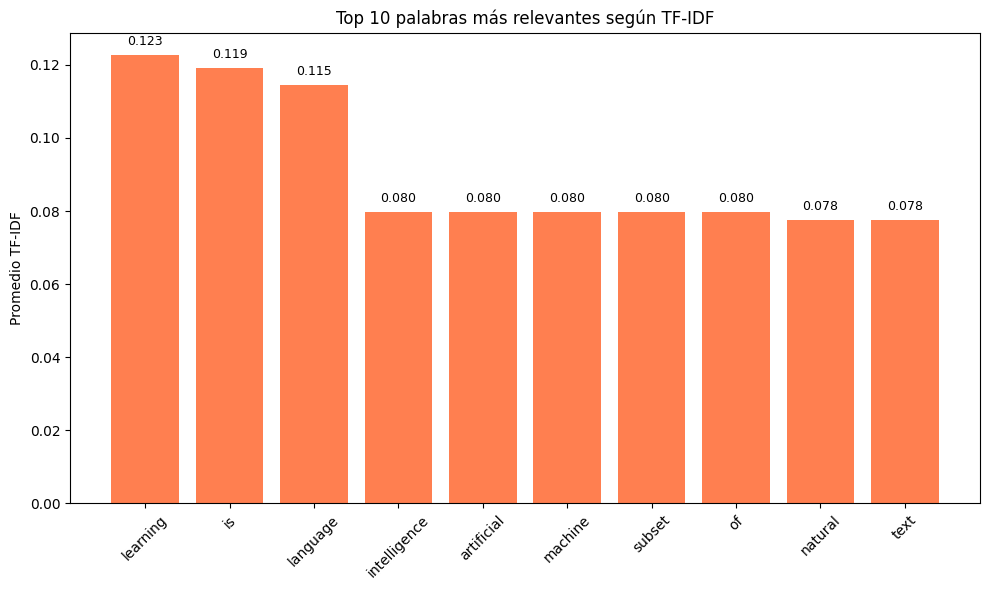

In [ ]:
import matplotlib.pyplot as plt
# Top 10 palabras más influyentes (por promedio TF-IDF)
tfidf_mean = df_tfidf.mean().sort_values(ascending=False).head(10)

# Graficar
plt.figure(figsize=(10, 6))
bars = plt.bar(tfidf_mean.index, tfidf_mean.values, color='coral')
plt.title('Top 10 palabras más relevantes según TF-IDF')
plt.ylabel('Promedio TF-IDF')
plt.xticks(rotation=45)

# Añadir valores sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.002, f"{yval:.3f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

